In [88]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.


In [89]:
#Loading dataset
faces = fetch_lfw_people(min_faces_per_person=60)
print('data loaded')
print(faces.target_names)
print(faces.images.shape)

data loaded
['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [90]:
print(faces.keys())

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])


In [91]:
X = faces.data
y = faces.target
target_names = faces.target_names
n_classes = target_names.shape[0]

In [92]:
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [93]:
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42).fit(X_train)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [94]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [95]:
#Determining the best combination of parameters using Grid Search CV

print("Fitting the classifier to the training set")

param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced'), param_grid
)
clf = clf.fit(X_train_pca, y_train)

print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set


/home/naman/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [96]:
# Precision, Recall, F1 Score and Support

print("Predicting people's names on the test set")

y_pred = clf.predict(X_test_pca)

print(classification_report(y_test, y_pred, target_names=target_names))

Predicting people's names on the test set
                   precision    recall  f1-score   support

     Ariel Sharon       0.71      0.67      0.69        15
     Colin Powell       0.79      0.88      0.83        68
  Donald Rumsfeld       0.83      0.81      0.82        31
    George W Bush       0.91      0.87      0.89       126
Gerhard Schroeder       0.83      0.87      0.85        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.89      0.95      0.92        42

         accuracy                           0.86       337
        macro avg       0.85      0.84      0.84       337
     weighted avg       0.86      0.86      0.86       337



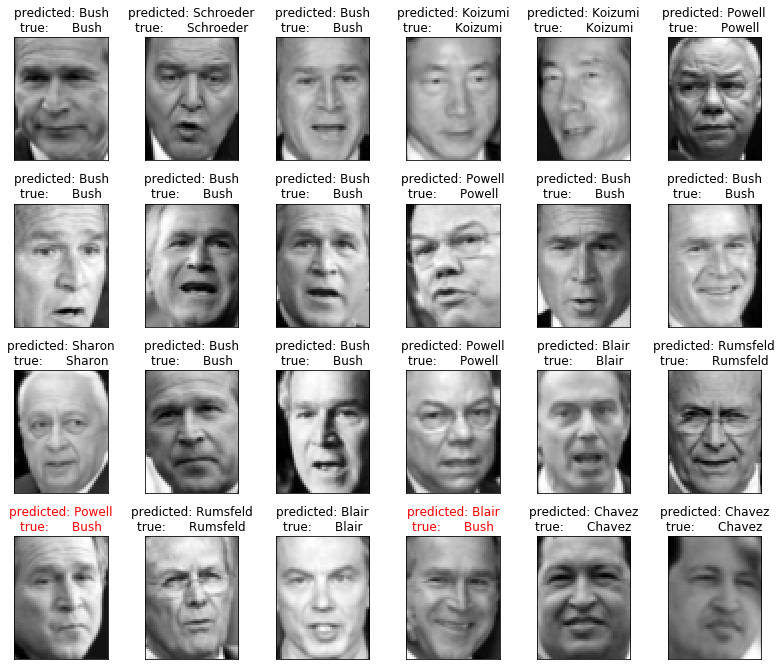

In [97]:
# Subplot of images with correct labels in black and incorrect labels in red
n_samples, h, w = faces.images.shape
def plot_gallery(images, titles, h, w, n_row=4, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    Actual_value=[target_names[y_test[i]].rsplit(' ', 1)[-1]for i in range(y_pred.shape[0])]
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        if(titles[i]==Actual_value[i]):
            plt.title('predicted: %s\ntrue:      %s' % (titles[i], Actual_value[i]), size=12, color = 'black')
        else:
            plt.title('predicted: %s\ntrue:      %s' % (titles[i], Actual_value[i]), size=12, color = 'red')
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    return pred_name

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

In [98]:
# Confusion Matrix
print("Confusion matrix")
ConfusionMatrix=confusion_matrix(y_test, y_pred, labels=range(n_classes))
print(ConfusionMatrix)

Confusion matrix
[[ 10   1   2   2   0   0   0   0]
 [  2  60   2   3   0   0   0   1]
 [  1   3  25   2   0   0   0   0]
 [  0  11   1 109   2   1   0   2]
 [  0   0   0   1  20   0   1   1]
 [  1   1   0   1   2  14   0   1]
 [  0   0   0   0   0   0  12   0]
 [  0   0   0   2   0   0   0  40]]


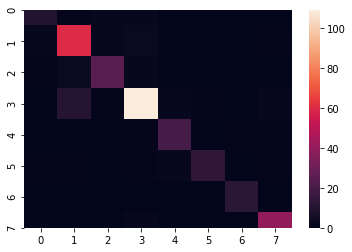

In [99]:
#Heatmap using the confusion matrix
sns.heatmap(ConfusionMatrix)